In [70]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

In [71]:
import xlrd
book = xlrd.open_workbook("Datasheets info.xlsx")
sheetMQ2 = book.sheet_by_name("MQ2 - Pololulu")
sheetMQ3 = book.sheet_by_name("MQ3 - Sparkfun")
sheetMQ4 = book.sheet_by_name("MQ4 - Sparkfun")
sheetMQ5 = book.sheet_by_name("MQ5 - Sparkfun")
sheetMQ6 = book.sheet_by_name("MQ6 - Sparkfun")
sheetMQ7 = book.sheet_by_name("MQ7 - Sparkfun")
sheetMQ8 = book.sheet_by_name("MQ8 - Sparkfun")
sheetMQ9 = book.sheet_by_name("MQ9 - Haoyuelectronics")
sheetMQ131 = book.sheet_by_name("MQ131- Sensorsportal")
sheetMQ135 = book.sheet_by_name("MQ135 - HANWEI")
sheetMQ303A = book.sheet_by_name("MQ303A - HANWEI")
sheetMQ309A = book.sheet_by_name("MQ309A - HANWEI")

In [72]:
for row_index in range(1,20): #reading first columns
    RsR0, Alcohol, Benzine, CH4, Hexane, LPG, CO = sheetMQ3.row_values(row_index, start_colx=0, end_colx=7)
    print(RsR0, "	", Alcohol, "	", Benzine, "	", CH4, "	", Hexane, "	", LPG, "	", CO)
 

0.1 	  	  	  	  	  	 
0.2 	 4.0 	  	  	  	  	 
0.3 	  	  	  	  	  	 
0.4 	  	  	  	  	  	 
0.5 	 1.0 	  	  	  	  	 
0.6 	  	  	  	  	  	 
0.7 	  	  	  	  	  	 
0.8 	  	 8.0 	  	  	  	 
0.9 	  	  	  	  	  	 
1.0 	 0.4 	 4.0 	  	  	  	 
2.0 	  	  	  	  	  	 
3.0 	  	  	  	  	  	 
4.0 	  	 0.1 	  	  	  	 
5.0 	  	  	  	  	  	 
6.0 	  	  	  	  	  	 
7.0 	  	  	  	  	  	 
8.0 	  	  	  	  	  	 
9.0 	  	  	  	  	  	 
10.0 	  	  	  	 8.0 	  	 


In [73]:
x_MQ3 = sheetMQ3.col_values(0)[2:]
MQ3_Alcohol = sheetMQ3.col_values(1)[2:]
MQ3_Benzine = sheetMQ3.col_values(2)[2:]
MQ3_CH4 = sheetMQ3.col_values(3)[2:]
MQ3_Hexane = sheetMQ3.col_values(4)[2:]
MQ3_LPG = sheetMQ3.col_values(5)[2:]
MQ3_CO = sheetMQ3.col_values(6)[2:]


In [74]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [75]:
MQ3_Alcohol =zero_to_nan(MQ3_Alcohol)
MQ3_Benzine =zero_to_nan(MQ3_Benzine)
MQ3_CH4 =zero_to_nan(MQ3_CH4)
MQ3_Hexane =zero_to_nan(MQ3_Hexane)
MQ3_LPG =zero_to_nan(MQ3_LPG)
MQ3_CO =zero_to_nan(MQ3_CO)

In [76]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import linear_model

dataAlcohol = {'RsRo': x_MQ3, 'Alcohol': MQ3_Alcohol}
dataBenzine = {'RsRo': x_MQ3, 'Benzine': MQ3_Benzine}
dataCH4 = {'RsRo': x_MQ3, 'CH4': MQ3_CH4}
dataHexane = {'RsRo': x_MQ3, 'Hexane': MQ3_Hexane}
dataLPG = {'RsRo': x_MQ3, 'LPG': MQ3_LPG}
dataCO = {'RsRo': x_MQ3, 'CO': MQ3_CO}

dfMQ3_Alcohol = pd.DataFrame(dataAlcohol)
dfMQ3_Benzine = pd.DataFrame(dataBenzine)
dfMQ3_CH4 = pd.DataFrame(dataCH4)
dfMQ3_Hexane = pd.DataFrame(dataHexane)
dfMQ3_LPG = pd.DataFrame(dataLPG)
dfMQ3_CO = pd.DataFrame(dataCO)

dfMQ3_Alcohol['Alcohol'] = pd.to_numeric(dfMQ3_Alcohol['Alcohol'])
dfMQ3_Benzine['Benzine'] = pd.to_numeric(dfMQ3_Benzine['Benzine'])
dfMQ3_CH4['CH4'] = pd.to_numeric(dfMQ3_CH4['CH4'])
dfMQ3_Hexane['Hexane'] = pd.to_numeric(dfMQ3_Hexane['Hexane'])
dfMQ3_LPG['LPG'] = pd.to_numeric(dfMQ3_LPG['LPG'])
dfMQ3_CO['CO'] = pd.to_numeric(dfMQ3_CO['CO'])

dfMQ3_Alcohol['Alcohol'] = dfMQ3_Alcohol['Alcohol'].replace('',None, regex=True)
dfMQ3_Benzine['Benzine'] = dfMQ3_Benzine['Benzine'].replace('',None, regex=True)
dfMQ3_CH4['CH4'] = dfMQ3_CH4['CH4'].replace('',None, regex=True)
dfMQ3_Hexane['Hexane'] = dfMQ3_Hexane['Hexane'].replace('',None, regex=True)
dfMQ3_LPG['LPG'] = dfMQ3_LPG['LPG'].replace('',None, regex=True)
dfMQ3_CO['CO'] = dfMQ3_CO['CO'].replace('',None, regex=True)

#Global X_Predict variable
X_Predict = dfMQ3_Alcohol.RsRo.apply(lambda x: [x]).tolist()

In [77]:
#Model and train alcohol
dataset2TrainAlcohol = dfMQ3_Alcohol.copy()
dataset2TrainAlcohol.dropna(inplace=True)
X_trainAlcohol = dataset2TrainAlcohol.RsRo.apply(lambda x: [x]).tolist()
y_trainAlcohol = dataset2TrainAlcohol['Alcohol'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainAlcohol, y_trainAlcohol)
#Predict
Alcohol_Predicted = model.predict(X_Predict)
#save into MQ2
MQ3_Alcohol = Alcohol_Predicted


In [78]:
#Model and train Benzine
dataset2TrainBenzine = dfMQ3_Benzine.copy()
dataset2TrainBenzine.dropna(inplace=True)
X_trainBenzine = dataset2TrainBenzine.RsRo.apply(lambda x: [x]).tolist()
y_trainBenzine = dataset2TrainBenzine['Benzine'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainBenzine, y_trainBenzine)
#Predict
Benzine_Predicted = model.predict(X_Predict)
#save into MQ2
MQ3_Benzine = Benzine_Predicted

In [79]:
#Model and train CH4
dataset2TrainCH4 = dfMQ3_CH4.copy()
dataset2TrainCH4.dropna(inplace=True)
X_trainCH4 = dataset2TrainCH4.RsRo.apply(lambda x: [x]).tolist()
y_trainCH4 = dataset2TrainCH4['CH4'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCH4, y_trainCH4)
#Predict
CH4_Predicted = model.predict(X_Predict)
#save into MQ2
MQ3_CH4 = CH4_Predicted

In [80]:
#Model and train Hexane
dataset2TrainHexane = dfMQ3_Hexane.copy()
dataset2TrainHexane.dropna(inplace=True)
X_trainHexane = dataset2TrainHexane.RsRo.apply(lambda x: [x]).tolist()
y_trainHexane = dataset2TrainHexane['Hexane'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainHexane, y_trainHexane)
#Predict
CO_Predicted = model.predict(X_Predict)
#save into MQ2
MQ3_Hexane = CO_Predicted

In [81]:
#Model and train LPG
dataset2TrainLPG = dfMQ3_LPG.copy()
dataset2TrainLPG.dropna(inplace=True)
X_trainLPG = dataset2TrainLPG.RsRo.apply(lambda x: [x]).tolist()
y_trainLPG = dataset2TrainLPG['LPG'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainLPG, y_trainLPG)
#Predict
LPG_Predicted = model.predict(X_Predict)
#save into MQ2
MQ3_LPG = LPG_Predicted

In [82]:
#Model and train CO
dataset2TrainCO = dfMQ3_CO.copy()
dataset2TrainCO.dropna(inplace=True)
X_trainCO = dataset2TrainCO.RsRo.apply(lambda x: [x]).tolist()
y_trainCO = dataset2TrainCO['CO'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCO, y_trainCO)
#Predict
CO_Predicted = model.predict(X_Predict)
#save into MQ2
MQ3_CO = CO_Predicted

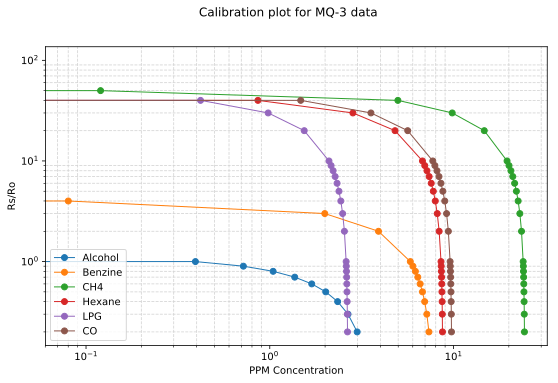

In [83]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(MQ3_Alcohol, x_MQ3, marker='o', linewidth=1, label='Alcohol')
plt.plot(MQ3_Benzine, x_MQ3, marker='o', linewidth=1, label='Benzine')
plt.plot(MQ3_CH4, x_MQ3, marker='o', linewidth=1, label='CH4')
plt.plot(MQ3_Hexane, x_MQ3, marker='o', linewidth=1, label='Hexane')
plt.plot(MQ3_LPG, x_MQ3, marker='o', linewidth=1, label='LPG')
plt.plot(MQ3_CO, x_MQ3, marker='o', linewidth=1, label='CO')

# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Calibration plot for MQ-3 data')
ax.set_xlabel('PPM Concentration')
ax.set_ylabel('Rs/Ro')


#Save image
plt.savefig('MQ3.svg', format = 'svg', dpi = 1200)
plt.savefig('MQ3.png')
plt.savefig('MQ3.eps', format = 'eps', dpi = 1200)